In [1]:
# import random
# import math
import numpy as np
np.random.seed(42)
from matplotlib import pyplot as plt
# from time import sleep
import ipywidgets as widgets
from ipywidgets import interactive
import pickle
%matplotlib inline

from world import World
from managers import Manager_simple, Breeder

from agent_simple_random import Agent_simple_random 
from agent_hemilton_cycle import Agent_hemilton_cycle
from genetic import Agent_genetic_3
# import genetic_instinct

# Basic usage of the framework

## Creating a World
World is an object which holds the current and past states of the environment and it updates the environment according to the rules. Let's create one:

In [2]:
w = World()
w

                |
                |
                |
  ◯◯            |
      ██        |
      ░░        |
                |
                | score=0 steps=0 

The black square represents the head of the snake, the dotted one is its body and the two circles denote the apple.

## Play a game in the world
We will use `Agent_simple_random` to illustrate the basics.
`Agent_simple_random` always goes in the direction of an apple if it sees one. If it doesn't see the apple, it chooses a random direction from those where there isn't an obstacle in a distance of 1.

In [3]:
agent = Agent_simple_random()
w.game(agent)
w

░░░░            |
░░░░            |
░░░░            |
░░░░            |
░░░░            |
░░░░░░░░░░░░░░  |
                |
            ◯◯  | score=15 steps=101  Game Over

We can now replay the game to see how the agent played. You can move through the game by dragging or arrow keys:

In [4]:
w.replay()

interactive(children=(IntSlider(value=50, description='step', max=101), Output(layout=Layout(height='450px')))…

## Use a manager to play multiple games
Manager is an object which can run multiple games or train the agents. It can also show the results. We will illustrate its use with `Manager_simple`. 

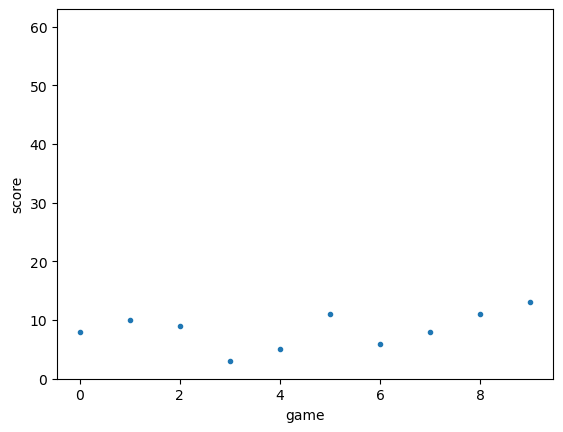

In [7]:
manager = Manager_simple(Agent_simple_random)

manager.play_games(10)
manager.plot()

## Using Breeder to manage genetic agents
`Breeder` can breed genetic agents. 

In [ ]:
br = Breeder(Agent_genetic_3, n_agents=5)
br.games_per_agent = 5

In [ ]:
%%time
br.breed(40)

In [ ]:
br.plot()

In [ ]:
plt.plot(br.generation_steps)

In [ ]:
br.agents = np.array([*selected, *b, *(a[:70])])
len(br.agents)

In [ ]:
# br.agents

In [ ]:
br_ = copy.deepcopy(br)
selected = br_.select_agents()
len(selected)

In [ ]:

# # a = br_.agents
# pickle.dump(selected, open("agents_genetic_1", "wb"))

# b = pickle.load(open("agents_genetic_1", "rb"))
# a = pickle.load(open("agents_genetic_120", "rb"))
# b = 
# len(b)
# len(a)

In [ ]:
agent = br.agents[20]
# w = World()
# w.game(agent)

# w.replay()

In [ ]:
# # agent = Agent_hemilton_cycle()
# agent = Agent_simple_random()
# w = World()
# w.game(agent)
# w 

# w.replay()

In [ ]:
%matplotlib tk
plt.ion()

def game(agent, w):
        w = World()
        fig, ax = plt.subplots()
        for i in range(19):
            if not w.game_over:
                agent_decision = agent.move(*w.view_3_end())
                w.step(agent_decision)
                ax.matshow(w.obs, origin='upper')
                plt.pause(0.01)
                sleep(0.01)

        # print(f'score {w.score}, steps {w.steps}')
        # return w.score, w.steps
game(agent, w)